In [31]:
# Data Analysis and Modeling
import pandas as pd
from sklearn.model_selection import train_test_split

# TF-IDF Analysis packages
from sklearn.feature_extraction.text import TfidfVectorizer

# Linear Regression
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

# Other
from matplotlib import pyplot as plt

# Packages for PostgreSQL Import
import psycopg2

In [2]:
# Ideally I'll move this into the project config.py file
# Otherwise for now I have to just manually assign . . .

dbname = "freelance_db"
username = "Metaverse"
pswd = "Arcifice91"

In [3]:
# Connect to Data (from: scraping_data.ipynb)

con = None
con = psycopg2.connect(database = dbname, user = username, host='localhost', password=pswd)

# Extract freelance_db as fl_table, don't bring Punjab obs
sql_query = """SELECT * FROM analysis_table;"""
analysis_dt = pd.read_sql_query(sql_query, con)
analysis_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               948 non-null    int64  
 1   invoices_per_month  948 non-null    float64
 2   hourly_rate         948 non-null    int64  
 3   earnings_pst_yr     948 non-null    object 
 4   earnings_pr_month   948 non-null    float64
 5   Midwest             948 non-null    int64  
 6   Northeast           948 non-null    int64  
 7   South               948 non-null    int64  
 8   Other               948 non-null    int64  
 9   West                948 non-null    int64  
 10  less_five_skills    948 non-null    int64  
 11  bio_length          948 non-null    int64  
 12  bio_word_count      948 non-null    int64  
 13  avg_word_length     948 non-null    float64
 14  num_stop            948 non-null    int64  
 15  bio_processed       948 non-null    object 
dtypes: float

### Trying tf-idf

1. I think this only works if I have a classifier
2. Could build something that tells someone if they have a top performing bio?
    - Weak because a big part of this is the LOOK of the bio.
    - Always could provide URL references.

In [ ]:
vectorizer = TfidfVectorizer()
analyze = vectorizer.build_analyzer()

analyze(analysis_dt.bio_processed[0])
analyze(analysis_dt.bio_processed[1])



### Running a simple linear regression

1. Predicting if someone will get a job in the first month

In [4]:
# Creating train, test splits
y = analysis_dt['hourly_rate']
X = analysis_dt[['invoices_per_month', 'Midwest', 'Northeast', 'South', 'West', 'less_five_skills',
               'bio_length', 'bio_word_count', 'avg_word_length', 'num_stop']]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(758, 10)
(190, 10)


In [36]:
# Modeling
# Reference: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py


# Create linear regression object
lm = linear_model.LinearRegression()

# Train model on training data
model = lm.fit(X_train, y_train)

# Make predictions on training set
preds = lm.predict(X_train)

# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, preds))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, preds))

Coefficients: 
 [-5.77456384e-01  1.21096096e+01  1.00849956e+01  1.42756318e+01
  1.46964158e+01 -4.75257415e+00  1.32664702e-02  1.40915968e-02
  1.27012828e-01 -2.48252495e-01]
Mean squared error: 880.88
Coefficient of determination: 0.03


In [40]:
print(X_train.shape)
print(y_train.shape)

(758, 10)
(758,)


ValueError: x and y must be the same size

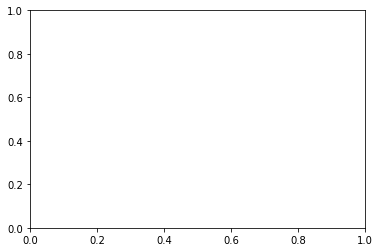

In [37]:
# Plot outputs
plt.scatter(X_train, y_train,  color='black')
plt.plot(X_train, y_train, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Using Cross-Validation

In [8]:
# Creating kfold object
kf = KFold(n_splits=5)  # Define the split - into 2 folds
# returns the number of splitting iterations in the cross-validator
kf.get_n_splits(X_train)

for train_index, test_index in kf.split(X_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_cv, y_test_cv = y[train_index], y[test_index]

In [13]:
# Modeling
# Reference: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py


# Create linear regression object
lm = linear_model.LinearRegression()

# Train model on training data
model = lm.fit(X_train, y_train)

In [24]:
# Perform 5-fold cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated scores", scores)

Cross-validated scores [-0.01803925  0.01615099 -0.13363831 -0.04238569  0.02569149]


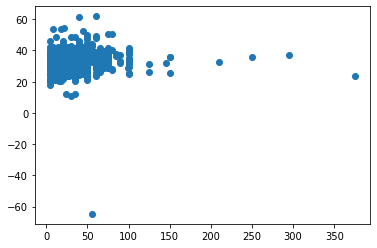

In [23]:
# Make cross validated predictions
predictions = cross_val_predict(model, X_train, y_train, cv=5)
plt.scatter(y_train, predictions)

In [27]:
# Checking R2
accuracy = metrics.r2_score(y_train, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: -0.018230478379610338
